<a href="https://colab.research.google.com/github/areegtarek/GRIP-The-Sparks-Foundation/blob/main/_1_Predict_score_of_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**by: Areeg Tarek**

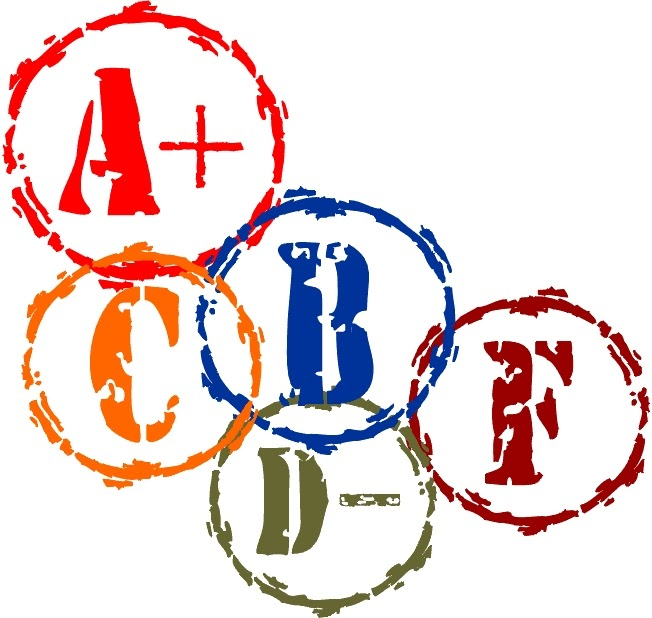

## **Linear Regression with Python Scikit Learn**
We will create a simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# **Data Description**

The dataset consist of two columns are Quantitative Data (Continuous Data)
- Scores: represent scores of students 
- Hours: the number of hours they studied 

# **Importing Necessary Libraries and datasets**

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# Importing the dataset 
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)

In [25]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **exploratory data analysis(EDA)**

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [27]:
dataset.duplicated().sum()

0

In [28]:
dataset.isnull().sum() #checking for total null values

Hours     0
Scores    0
dtype: int64

In [29]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Data Correlation:** is a way to understand the relationship betweem multiple variables and attributes 

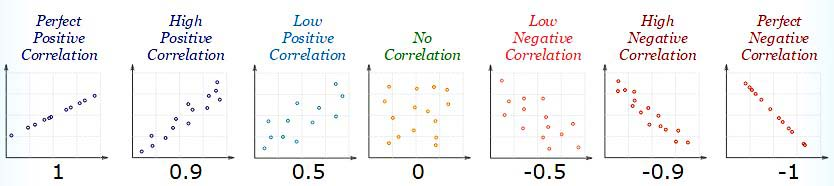

In [30]:
dataset.corr().style.background_gradient(cmap='Oranges')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

# **Numerical data distribution**

pair plot represent the distrubution of each feature and the relation between them 

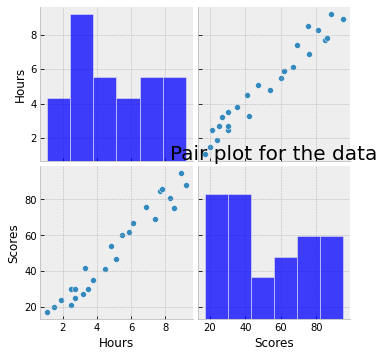

In [43]:
plt.rcParams['figure.figsize'] = (40, 41)
sns.pairplot(dataset, palette = 'husl')
plt.title('Pair plot for the data', fontsize = 20)
plt.show()

# **Preparing data for the model**

In [32]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# **Splitting the dataset into the Training set and Test set**

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [37]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)

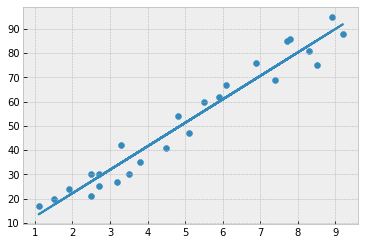

In [41]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [44]:
#Calculating Details
print('Model Train Score is : ' , regressor.score(X_train, y_train))
print('Model Test Score is : ' , regressor.score(X_test, y_test))

Model Train Score is :  0.9491209376364416
Model Test Score is :  0.9678055545167994


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [39]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244
